In [1]:
%pip install scipy
import numpy as np 
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter1d, gaussian_filter, gaussian_gradient_magnitude
from local_features import *
from functions import *

def visualize_the_image(image, title='Original image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from local_features import get_gauss_feat_multi


train_img = io.imread('3labels/training_image.png', as_gray=True)
train_label = io.imread('3labels/training_labels.png', as_gray=True)

In [23]:
# Compute Gaussian features at multiple scales
# The scales parameter controls the size of the neighborhood considered
scales = [1, 2, 4]  # Small, medium, and large neighborhoods
feature_img = get_gauss_feat_multi(train_img, scales)


print('Feature image shape:', feature_img)

Feature image shape: [[[-4.90148634e-01  2.93993734e-01  1.02973477e+00 ...  8.92462623e-01
   -2.52280724e-01 -1.97625476e+00]
  [ 4.87178230e-01  1.27106368e-01  5.43484989e-01 ...  3.91068524e-01
   -7.35624763e-02 -1.92864445e+00]
  [ 1.58776838e+00  3.81932350e-02  1.25048337e-03 ... -2.87028389e-01
    1.11282878e-02 -1.28354354e-01]]

 [[-3.46247355e-01  4.21575344e-01  1.09017191e+00 ... -4.08478714e-01
   -3.54862519e-01 -2.06654633e+00]
  [ 5.49860997e-01  3.02082037e-01  5.51372020e-01 ...  1.16381187e-01
   -1.77803997e-01 -1.95962929e+00]
  [ 1.59838661e+00  1.08321686e-01 -7.02462945e-05 ... -2.71018195e-01
    3.33539019e-02 -1.20659171e-01]]

 [[-2.48316699e-01  1.43373348e-01  1.12950198e+00 ... -3.93964004e-01
   -1.25018340e-01 -2.12519437e+00]
  [ 6.37804684e-01  3.09808663e-01  5.61866813e-01 ... -1.72385019e-01
   -1.94650246e-01 -2.00479585e+00]
  [ 1.61693022e+00  1.50788427e-01 -2.63986962e-03 ... -2.40158700e-01
    5.46386355e-02 -1.05471952e-01]]

 ...

 [[-

In [24]:
# Reshape feature image for clustering
# Original shape: height × width × num_features
# New shape: (height×width) × num_features, where each row is a feature vector
rows, cols, num_features = feature_img.shape
features_reshaped = feature_img.reshape(rows * cols, num_features)

print(f"Feature image shape: {feature_img.shape}")
print(f"Reshaped features shape: {features_reshaped.shape}")

Feature image shape: (409600, 3, 15)
Reshaped features shape: (1228800, 15)


In [26]:
# Get unique labels
unique_labels = np.unique(train_label)
num_labels = len(unique_labels)
print(f"Number of unique labels: {num_labels}")
print(f"Label values: {unique_labels}")

# Create label probability image
# For each pixel, we'll have a vector of length num_labels
# with a 1 in the position of the correct label and 0 elsewhere
label_prob_img = np.zeros((train_label.shape[0], train_label.shape[1], num_labels))

# Fill in the label probability image
for i, label in enumerate(unique_labels):
    # Find all pixels with this label
    label_mask = (train_label == label)
    # Set probability to 1 for these pixels in the corresponding channel
    label_prob_img[:, :, i][label_mask] = 1

# Reshape label probabilities to match the reshaped features
label_prob_reshaped = label_prob_img.reshape(train_label.shape[0] * train_label.shape[1], num_labels)

print(f"Label probability image shape: {label_prob_img.shape}")
print(f"Reshaped label probabilities shape: {label_prob_reshaped.shape}")

Number of unique labels: 3
Label values: [  0 128 255]
Label probability image shape: (640, 640, 3)
Reshaped label probabilities shape: (409600, 3)


In [ ]:
from sklearn.cluster import KMeans
import random

# Sample a subset of features for clustering (for efficiency)
num_samples = min(10000, rows)  # Take at most 10,000 samples (one per pixel)
sample_indices = random.sample(range(rows), num_samples)

sampled_features = features_reshaped[sample_indices]
sampled_labels = label_prob_reshaped[sample_indices]

# Perform k-means clustering
num_clusters = 100  # Size of our dictionary
print(f"Clustering {num_samples} feature vectors into {num_clusters} clusters...")
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(sampled_features)
cluster_centers = kmeans.cluster_centers_

# Find cluster assignments for our samples
sample_cluster_assignments = kmeans.predict(sampled_features)

# Compute label probabilities for each cluster
# This is where we associate dictionary elements with labels
cluster_label_probs = np.zeros((num_clusters, num_labels))

# For each cluster, compute probability of each label
for cluster_idx in range(num_clusters):
    # Find samples assigned to this cluster
    cluster_mask = (sample_cluster_assignments == cluster_idx)
    # If no samples in this cluster, continue
    if not np.any(cluster_mask):
        continue
    # Get labels of samples in this cluster
    cluster_labels = sampled_labels[cluster_mask]
    # Compute probability of each label in this cluster
    cluster_label_probs[cluster_idx] = np.mean(cluster_labels, axis=0)

print("Cluster label probabilities shape:", cluster_label_probs.shape)

# Visualize a few clusters and their label probabilities
print("\nExample cluster probabilities:")
for i in range(min(5, num_clusters)):
    print(f"Cluster {i}: {cluster_label_probs[i]}")

IndexError: index 840929 is out of bounds for axis 0 with size 409600

In [ ]:
import os
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
import local_features as lf
import scipy.ndimage





NameError: name '__file__' is not defined

IndexError: list assignment index out of range

In [3]:
F = get_gauss_feat_multi(I, [3, 6, 9], normalize=True)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def visualize_gaussian_features(features, original_shape, sigmas):
    """
    Create a beautiful visualization of multi-scale Gaussian derivatives
    
    Parameters:
        features: The output from get_gauss_feat_multi (shape: pixels, scales, derivatives)
        original_shape: Tuple of (height, width) of the original image
        sigmas: List of sigma values used when generating the features
    """
    height, width = original_shape
    n_scales = features.shape[1]
    n_derivatives = features.shape[2]  # Should be 15
    
    # Define derivative labels with proper mathematical notation
    derivative_labels = [
        r'$G$',                           # 0th order (Gaussian smoothing)
        r'$G_y$', r'$G_x$',               # 1st order derivatives
        r'$G_{yy}$', r'$G_{xy}$', r'$G_{xx}$',  # 2nd order derivatives
        r'$G_{yyy}$', r'$G_{xyy}$', r'$G_{xxy}$', r'$G_{xxx}$',  # 3rd order
        r'$G_{yyyy}$', r'$G_{xyyy}$', r'$G_{xxyy}$', r'$G_{xxxy}$', r'$G_{xxxx}$'  # 4th order
    ]
    
    # Create figure with more control using GridSpec
    fig = plt.figure(figsize=(20, 3.5 * n_scales))
    gs = GridSpec(n_scales, n_derivatives, figure=fig, wspace=0.1, hspace=0.25)
    
    # Use consistent color normalization across derivatives of the same type
    normalizations = []
    for deriv in range(n_derivatives):
        all_scales_this_deriv = features[:, :, deriv].reshape(n_scales, -1)
        vmin = np.percentile(all_scales_this_deriv, 2)  # 2nd percentile for min
        vmax = np.percentile(all_scales_this_deriv, 98)  # 98th percentile for max
        normalizations.append((vmin, vmax))
    
    # Create all subplots
    for scale in range(n_scales):
        for deriv in range(n_derivatives):
            ax = fig.add_subplot(gs[scale, deriv])
            
            # Get feature and reshape to image dimensions
            feature_map = features[:, scale, deriv].reshape(height, width)
            
            # Apply consistent normalization for this derivative type
            vmin, vmax = normalizations[deriv]
            im = ax.imshow(feature_map, cmap='viridis', vmin=vmin, vmax=vmax)
            
            # Clean up axes - minimal borders
            ax.set_xticks([])
            ax.set_yticks([])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            
            # Add titles only to the top row
            if scale == 0:
                ax.set_title(derivative_labels[deriv], fontsize=12, pad=8)
            
            # Add scale labels to the left column
            if deriv == 0:
                ax.set_ylabel(f'σ = {sigmas[scale]}', fontsize=12, rotation=0, ha='right', va='center', labelpad=10)
    
    # Add a single colorbar per row (per scale)
    for scale in range(n_scales):
        cax = fig.add_axes([0.92, 0.1 + (0.8/n_scales)*(n_scales-scale-1), 0.01, 0.8/n_scales-0.05])
        feature_for_cbar = features[:, scale, 0].reshape(height, width)
        norm = plt.Normalize(vmin=np.percentile(feature_for_cbar, 2), vmax=np.percentile(feature_for_cbar, 98))
        plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), cax=cax)
    
    # Add a main title
    plt.suptitle('Multi-scale Gaussian Derivative Features', fontsize=16, y=0.98)
    
    # Adjust layout
    plt.subplots_adjust(left=0.05, right=0.9, top=0.94, bottom=0.05)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming your feature array has shape (409600, 3, 15)
# features = your_features_array
# height, width = 640, 640  # Adjust to your image dimensions
# sigmas = [1, 2, 4]  # The sigma values you used

# visualize_gaussian_features(features, (height, width), sigmas)

C:\Users\Petrb\AppData\Local\Temp\ipykernel_23980\3859149352.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


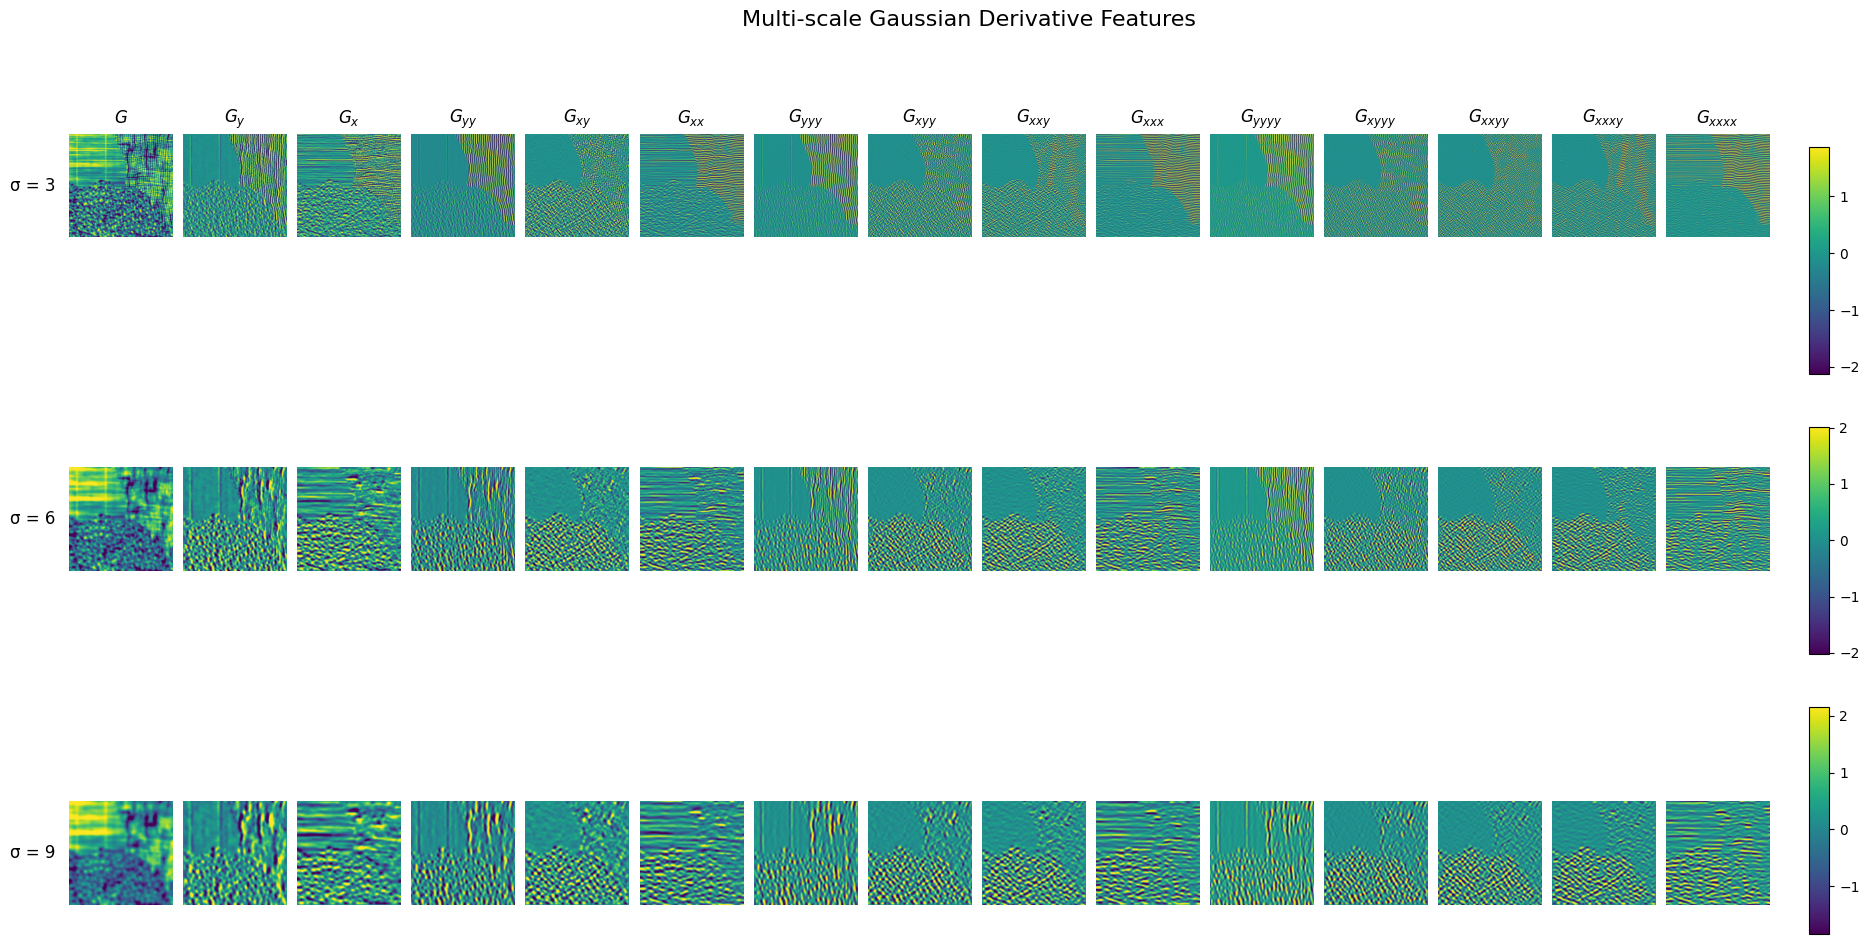

In [4]:
side_length = int(np.sqrt(409600))
original_shape = (side_length, side_length)

# Reshape your features if they're in a different format
# features_reshaped = features.reshape(-1, 3, 15)

# Call the visualization function
visualize_gaussian_features(F, original_shape, [3, 6, 9])


In [5]:
def prepare_features_for_clustering(features, original_shape):
    """
    Transform multi-scale Gaussian features into a format suitable for clustering.
    
    Parameters:
        features: Output from get_gauss_feat_multi, shape (pixels, scales, derivatives)
                 In your case: (409600, 3, 15)
        original_shape: Optional (height, width) of original image for reference
    
    Returns:
        feature_vectors: 2D array with shape (pixels, scales*derivatives)
                         In your case: (409600, 45)
    """
    # get the dimensions 
    n_pixels, n_scales, n_derivatives = features.shape

    # This rearranges the last two dimensions (scales and derivatives) 
    # into a single dimension while keeping the pixel dimension intact
    feature_vectors = features.reshape(n_pixels, n_scales * n_derivatives)

    print(f"Original feature shape: {features.shape}")
    print(f"Transformed feature shape: {feature_vectors.shape}")
    
    return feature_vectors


def visualize_one_hot_labels(one_hot_labels):
    """
    Visualize one-hot encoded labels as an image.
    
    Parameters:
        one_hot_labels: 3D array of shape (height, width, n_labels)
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(one_hot_labels[:, :, :])
    plt.axis('off')
    plt.title('One-hot encoded labels')
    plt.show()


In [6]:
ready_for_cluster = prepare_features_for_clustering(F, (I.shape[0], I.shape[1]))

Original feature shape: (409600, 3, 15)
Transformed feature shape: (409600, 45)


[0 1 2]
Unique labels: [0 1 2]
Counts: [103715 175462 130423]
Conversion successful!
Label probability image shape: (640, 640, 3)


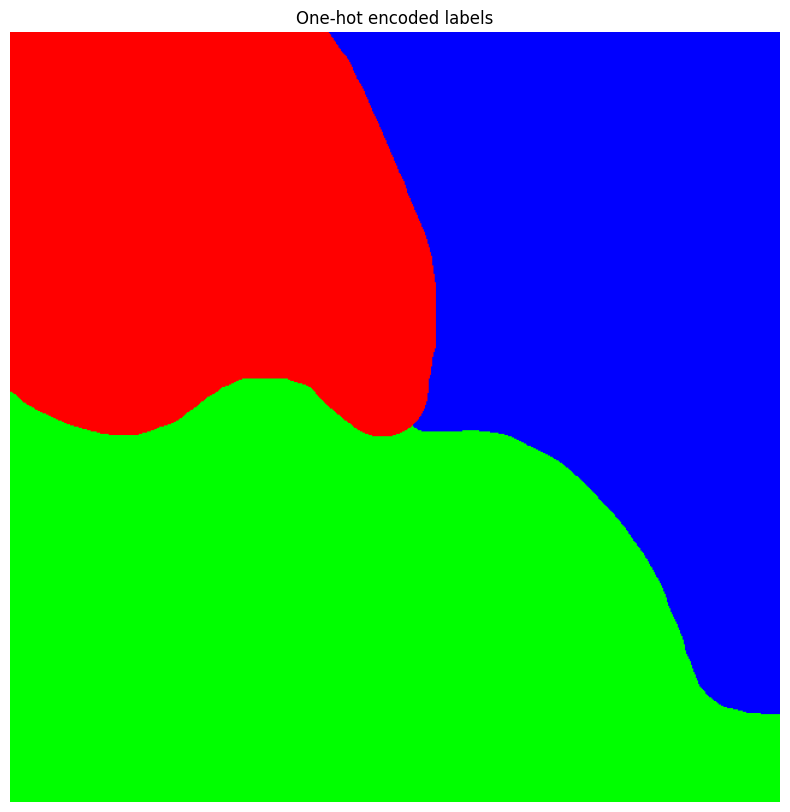

In [7]:
# find the unique labels and how many of them are there 

# load the image with labels 

filename_ = "3labels/training_labels.png"
label_image = skimage.io.imread(filename_).astype(float)/255

def find_unique_labels(image):
    """
    Find unique labels in an image and count their occurrences.
    
    Parameters:
        image: 2D array of integers
    
    Returns:
        labels: 1D array of unique labels
        counts: 1D array of counts for each label
    """ 
    # get the unique labels and their counts
    labels, counts = np.unique(image, return_counts=True)

    # change the labels to integers starting from zero to the length of labels 
    labels = np.arange(len(labels))
    
    # remap the labels in the image to the new labels
    unique_vals = np.unique(image)
    label_mapping = {val: idx for idx, val in enumerate(unique_vals)}
    image = np.vectorize(lambda x: label_mapping[x])(image)

    print(labels)
    return image, labels, counts

label_image, labels, counts = find_unique_labels(label_image)

print(f"Unique labels: {labels}")
print(f"Counts: {counts}")



    
# Create identity matrix for one-hot encoding
identity_matrix = np.eye(len(labels))
    
# Now this should work with integer indices
label_probability_image = identity_matrix[label_image]
    
print("Conversion successful!")
print(f"Label probability image shape: {label_probability_image.shape}")



visualize_one_hot_labels(label_probability_image)

In [8]:
print(f"Feature shape for clustering {ready_for_cluster.shape}")


print(f"Label shape for clustering {label_probability_image.shape}")



# labels for clustering 
r_, c_, label = label_probability_image.shape 

label_shape = label_probability_image.reshape(r_*c_, label)

print(f"Label shape for clustering {label_shape.shape}")

Feature shape for clustering (409600, 45)
Label shape for clustering (640, 640, 3)
Label shape for clustering (409600, 3)


In [9]:
total_pixels = label_shape.shape[0]
sample_size = 8000

# generate random indices without replacement
random_indices = np.random.choice(total_pixels, sample_size, replace=False)


# sample fatures and labels 
feature_sample = ready_for_cluster[random_indices]
label_sample = label_shape[random_indices]

print(f"Feature sample shape: {feature_sample.shape}")
print(f"Label sample shape: {label_sample.shape}")


Feature sample shape: (8000, 45)
Label sample shape: (8000, 3)


In [16]:
from sklearn.cluster import KMeans

# number of clusters
n_clusters = 500 

# create the kmeans object
kmeans = KMeans(n_clusters=n_clusters)

# fit the model
kmeans.fit(feature_sample)

# get the cluster labels

cluster_labels = kmeans.labels_

print(f"Cluster labels shape: {cluster_labels.shape}")

Cluster labels shape: (8000,)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def select_random_samples(features, label_probability_image, n_samples=10000):
    """
    Select a random subset of feature vectors with corresponding labels.
    
    Parameters:
        features: 2D array of feature vectors (pixels, features)
        label_probability_image: 3D array of one-hot encoded labels (height, width, n_labels)
        n_samples: Number of samples to select
    """
    # Get dimensions
    n_pixels = features.shape[0]
    
    # Reshape label image for easier indexing
    height, width, n_labels = label_probability_image.shape
    labels_flat = label_probability_image.reshape(-1, n_labels)
    
    # Generate random indices without replacement
    indices = np.random.permutation(n_pixels)[:n_samples]
    
    # Select feature vectors and corresponding labels
    sampled_features = features[indices]
    sampled_labels = labels_flat[indices]
    
    print(f"Selected {n_samples} random samples")
    print(f"Sampled features shape: {sampled_features.shape}")
    print(f"Sampled labels shape: {sampled_labels.shape}")
    
    return sampled_features, sampled_labels

def build_dictionary_with_kmeans(features, n_clusters=500):
    """
    Build a dictionary using k-means clustering.
    
    Parameters:
        features: 2D array of feature vectors
        n_clusters: Number of clusters to use
        
    Returns:
        kmeans: Fitted KMeans model
    """
    print(f"Applying k-means clustering with {n_clusters} clusters...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(features)
    
    print(f"K-means clustering completed")
    print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
    
    return kmeans

def compute_cluster_label_probabilities(kmeans, features, labels):
    """
    Compute the probability of each cluster belonging to each label.
    
    Parameters:
        kmeans: Fitted KMeans model
        features: Feature vectors used for clustering
        labels: Corresponding one-hot encoded labels
        
    Returns:
        cluster_label_probs: Array of shape (n_labels, n_clusters) with probabilities
    """
    # Get cluster assignments for all features
    cluster_assignments = kmeans.predict(features)
    
    # Get dimensions
    n_clusters = kmeans.n_clusters
    n_labels = labels.shape[1]
    
    # Initialize array to store label probabilities (nₗ × nₖ)
    cluster_label_probs = np.zeros((n_labels, n_clusters))
    
    # Count occurrences of each label in each cluster
    for i, cluster_idx in enumerate(cluster_assignments):
        cluster_label_probs[:, cluster_idx] += labels[i]
    
    # Normalize to get probabilities (add small epsilon to avoid division by zero)
    cluster_counts = np.sum(cluster_label_probs, axis=0, keepdims=True)
    cluster_label_probs = cluster_label_probs / (cluster_counts + 1e-10)
    
    print(f"Label probabilities computed with shape: {cluster_label_probs.shape}")
    
    return cluster_label_probs

def build_dictionary(ready_for_cluster, label_probability_image, n_samples=10000, n_clusters=500):
    """
    Build a dictionary and compute label probabilities.
    
    Parameters:
        ready_for_cluster: 2D array of feature vectors (pixels, features)
        label_probability_image: 3D array of one-hot encoded labels (height, width, n_labels)
        n_samples: Number of random samples to use
        n_clusters: Number of clusters for k-means
        
    Returns:
        kmeans: Fitted KMeans model
        cluster_label_probs: Array of label probabilities for each cluster
    """
    # Step 1: Select random samples
    sampled_features, sampled_labels = select_random_samples(
        ready_for_cluster, label_probability_image, n_samples)
    
    # Step 2: Apply k-means clustering
    kmeans = build_dictionary_with_kmeans(sampled_features, n_clusters)
    
    # Step 3: Compute label probabilities for each cluster
    cluster_label_probs = compute_cluster_label_probabilities(
        kmeans, sampled_features, sampled_labels)
    
    return kmeans, cluster_label_probs

def visualize_cluster_centers(kmeans, n_to_show=5):
    """
    Visualize a few cluster centers.
    
    Parameters:
        kmeans: Fitted KMeans model
        n_to_show: Number of random clusters to visualize
    """
    cluster_centers = kmeans.cluster_centers_
    n_clusters = cluster_centers.shape[0]
    
    # Randomly select a few clusters to visualize
    indices = np.random.permutation(n_clusters)[:n_to_show]
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, n_to_show, i+1)
        
        # Reshape to (3, 15) to separate scales and derivatives
        reshaped = cluster_centers[idx].reshape(3, 15)
        
        # Plot the first derivative (Gaussian smoothing) from each scale
        plt.bar(range(3), reshaped[:, 0])
        plt.title(f"Cluster {idx}")
        plt.xticks(range(3), ['σ=3', 'σ=6', 'σ=9'])
    
    plt.tight_layout()
    plt.show()

def visualize_label_probabilities(cluster_label_probs):
    """
    Visualize label probabilities for each cluster in 3 subfigures.
    
    Parameters:
        cluster_label_probs: Array of shape (n_labels, n_clusters) with probabilities
    """
    n_labels, n_clusters = cluster_label_probs.shape
    
    # Create 3 subplots in one figure
    fig, axs = plt.subplots(1, n_labels, figsize=(5 * n_labels, 5))
    
    for label in range(n_labels):
        axs[label].plot(range(n_clusters), cluster_label_probs[label])
        axs[label].set_xlabel("Cluster Index")
        axs[label].set_ylabel("Probability")
        axs[label].set_title(f"Label {label}")
        axs[label].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


Selected 10000 random samples
Sampled features shape: (10000, 45)
Sampled labels shape: (10000, 3)
Applying k-means clustering with 500 clusters...
K-means clustering completed
Cluster centers shape: (500, 45)
Label probabilities computed with shape: (3, 500)


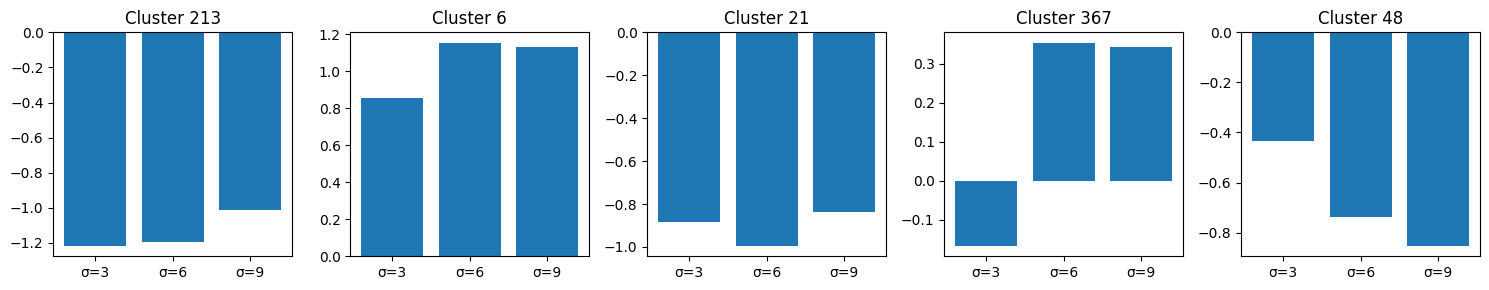

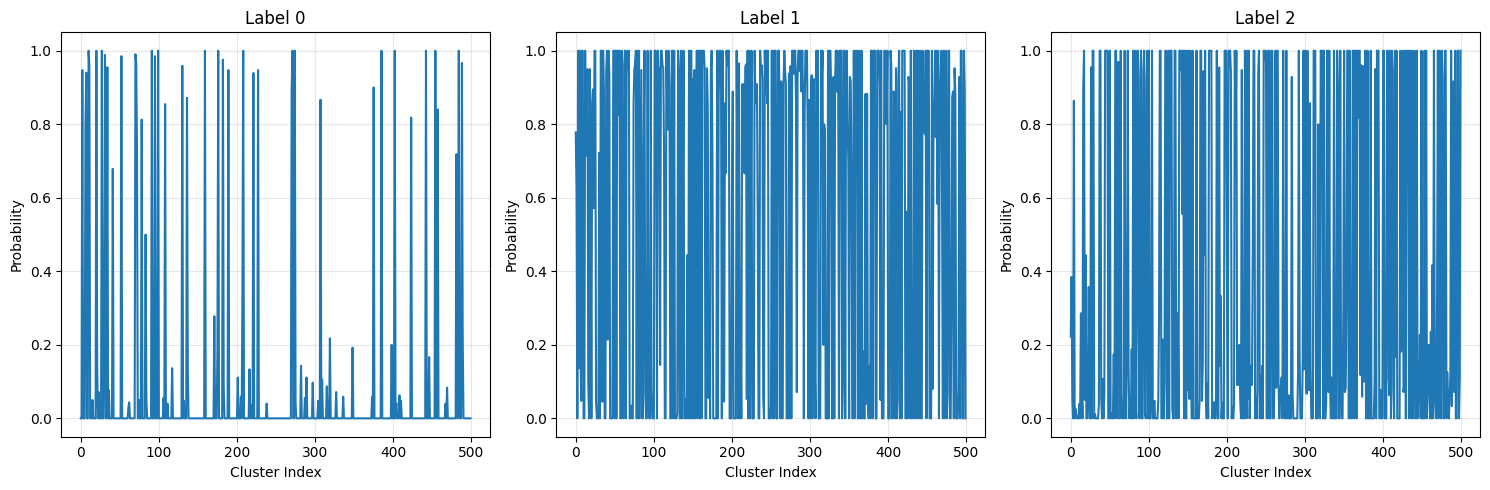

In [29]:
# Use the previously prepared features and label probability image
n_samples = 10000  # Number of random samples to use
n_clusters = 500   # Number of clusters for k-means

# Build the dictionary
kmeans, cluster_label_probs = build_dictionary(
    ready_for_cluster, 
    label_probability_image, 
    n_samples, 
    n_clusters
)

# Visualize the results
visualize_cluster_centers(kmeans)
visualize_label_probabilities(cluster_label_probs)

# Quiz


#### Valid patch position: 
- Not every pixel in the image can be the center of a valid 9x9 patch. Pixels near the borders don't have enough pixels to form complete patches. 

#### How many valid centers?
- The term (h - (s1 - 1)) * (w - (s2 - 1)) counts how many valid path center positions exists in thhe iamge. 
where: 
    - h: height of the image
    - w: width of the image
    - s1: height of the patch
    - s2: width of the patch¨


- Imagine sliding a patch across the image, placing its top-left corner at different positions. The rightmost valid column for placing this corner is w - s2, and the bottom most valid row is h-s1. This gives us (h - s1 + 1) * (w - s2 + 1) valid patch´positions, which is mathematically identical to (h - (s1 - 1)) * (w - (s2 - 1).

#### Number of features per patch
- Each valid patch contains s1 * s2 pixels. (81 pixels in this case)

In [8]:
def valid_positions(h, w, s1, s2):
    
    return (h - (s1 - 1)) * (w - (s2 - 1)) * s1 * s2


image = ()


feature_size = valid_positions(256, 408, 5, 5) 

print(f"Feature size: {feature_size}")

Feature size: 2545200


In [ ]:
cluster_probability = 0.26 


dominant_segmentation = 3 

In [10]:
data = create_entry(features_size=feature_size, cluster_probability=cluster_probability, dominant_segmentation=dominant_segmentation)

name_of_file = "quiz.txt"

save_to_file(name_of_file, data)

print(f"Data saved to {name_of_file}")

Data saved to quiz.txt


In [ ]:
def calculate_patch_features_array_size(image_height, image_width, patch_height, patch_width):
    """
    Calculate the total number of elements in a 3D array storing patch features.
    
    Parameters:
        image_height (int): Height of the original image in pixels
        image_width (int): Width of the original image in pixels
        patch_height (int): Height of each patch in pixels
        patch_width (int): Width of each patch in pixels
        
    Returns:
        dict: Dictionary containing the calculated values and explanations
    """
    # Calculate the number of valid patch positions vertically
    valid_rows = image_height - (patch_height - 1)
    
    # Calculate the number of valid patch positions horizontally
    valid_columns = image_width - (patch_width - 1)
    
    # Calculate the number of features per patch
    features_per_patch = patch_height * patch_width
    
    # Calculate the total number of elements in the 3D array
    total_elements = valid_rows * valid_columns * features_per_patch
    
    # Create a dictionary with the results and explanations
    result = {
        "image_dimensions": f"{image_height}×{image_width}",
        "patch_dimensions": f"{patch_height}×{patch_width}",
        "valid_patch_positions_vertical": valid_rows,
        "valid_patch_positions_horizontal": valid_columns,
        "total_valid_patch_positions": valid_rows * valid_columns,
        "features_per_patch": features_per_patch,
        "total_elements": total_elements,
        "array_shape": f"({valid_rows}, {valid_columns}, {features_per_patch})"
    }
    
    return result

def print_results(result):
    """Print the results in a formatted, easy-to-understand way."""
    print("\n=== Patch Features Array Size Calculator ===\n")
    print(f"Image dimensions: {result['image_dimensions']} pixels")
    print(f"Patch dimensions: {result['patch_dimensions']} pixels")
    print("\n--- Calculation Breakdown ---")
    print(f"Valid patch positions vertically: {result['valid_patch_positions_vertical']}")
    print(f"Valid patch positions horizontally: {result['valid_patch_positions_horizontal']}")
    print(f"Total valid patch positions: {result['total_valid_patch_positions']:,}")
    print(f"Features per patch: {result['features_per_patch']}")
    print("\n--- Results ---")
    print(f"Total elements in 3D array: {result['total_elements']:,}")
    print(f"3D array shape: {result['array_shape']}")
    

def main():
    """Main function to get user input and display results."""
    try:
        print("Enter image and patch dimensions:")
        image_height = int(input("Image height (pixels): "))
        image_width = int(input("Image width (pixels): "))
        patch_height = int(input("Patch height (pixels): "))
        patch_width = int(input("Patch width (pixels): "))
        
        # Validate inputs
        if any(dim <= 0 for dim in [image_height, image_width, patch_height, patch_width]):
            print("Error: All dimensions must be positive integers.")
            return
            
        if patch_height > image_height or patch_width > image_width:
            print("Error: Patch dimensions cannot be larger than image dimensions.")
            return
            
        # Calculate and display results
        result = calculate_patch_features_array_size(
            image_height, image_width, patch_height, patch_width)
        print_results(result)
        
    except ValueError:
        print("Error: Please enter valid integer values for all dimensions.")

# Run the script if executed directly
if __name__ == "__main__":
    main()

Enter image and patch dimensions:

=== Patch Features Array Size Calculator ===

Image dimensions: 256×408 pixels
Patch dimensions: 9×9 pixels

--- Calculation Breakdown ---
Valid patch positions vertically: 248
Valid patch positions horizontally: 400
Total valid patch positions: 99,200
Features per patch: 81

--- Results ---
Total elements in 3D array: 8,035,200
3D array shape: (248, 400, 81)

--- Memory Estimation ---
Approximate memory required (as float32): 30.65 MB (0.03 GB)
